In [1]:
from spaff.wrappers import SphereFit
import healpy as hp
import numpy as np


In [2]:
fit = SphereFit(n_samples=200000)

The SphereFt class is an iterator, which will apply all of the stages required to take a step in exploring the space. There are 4 stage contained in this loops:
- hypothesise as next step, performed by the 'hyp_function' keyword 
- evaluate the proposed step, performed by the 'eval_function' keyword argument
- accept or reject the next step, performed by the 'acc_function' keyword argument
- Finally, decide whether to save the current state to disk, performed by the 'logging' keyword argument  
Not all outputs may want to be saved - for example, a phase of burn-in might be desired, or only a maximum likelihood estimate is desired, or the size of outputs mean only a subsection are recorded.  
  
The iterator also needs a data input to compare all hypothesises to. 

In [3]:
nside = 2
n_pix = hp.nside2npix(nside)
pixel_values = np.ones(n_pix)
#pixel_values = np.random.normal(0,1,n_pix)

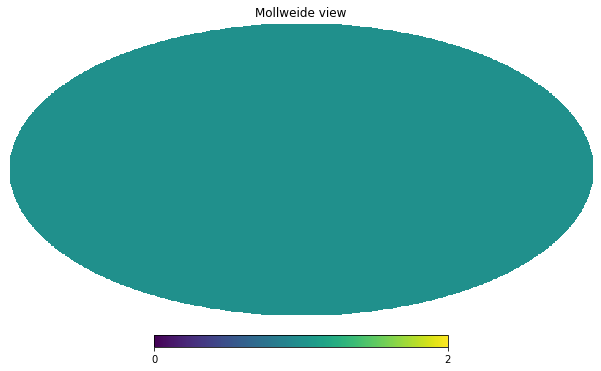

In [4]:
hp.visufunc.mollview(pixel_values)

In [5]:
n_alm = len(hp.map2alm(pixel_values, lmax=2*nside-1))
#alm_hyp = 


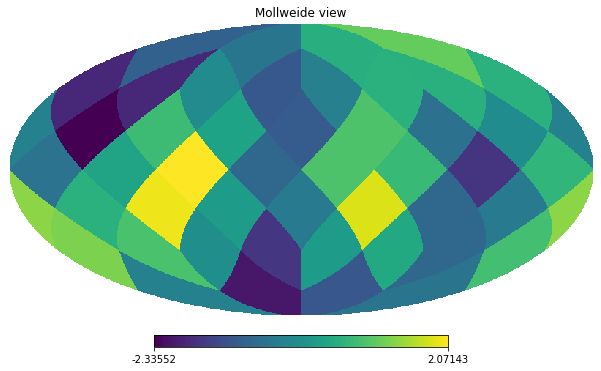

In [6]:
e_hyp_in = np.random.normal(0,1, n_alm) + 1.0j* np.random.normal(0,1, n_alm)
fit.emodes=e_hyp_in
fit.current_state = e_hyp_in
mapgo = hp.alm2map(e_hyp_in, nside=nside)
hp.visufunc.mollview(mapgo)

In [7]:
fit.data = pixel_values
fit.error_map = np.ones(pixel_values.shape)

In [8]:
fit.run()

accepted 0 887.6288313534113 112.37116864658864
accepted 1 3.1601420202934065 109.21102662629524
accepted 5 4.62483440458756 104.58619222170768


In [9]:
fit.data_hyp

array([-13.20472252, -49.05763734, -33.89578392,  -3.15621937,
        27.84315479,  -7.43249893,   2.76510829, -52.65073312,
       -34.41932557,  49.52651733,  31.21445447,  37.96010671,
        46.12401861, -11.02622194,  32.28206317,  29.71842601,
       -64.49710854,  69.63810984,  98.4152037 ,  23.99386302,
       -11.11067912, -12.20065539,  98.68061705, -15.93527659,
        -8.34721256, 142.30590857,  38.23544221,   3.28819099,
       -42.02840629, -53.60843385,  62.14877565,  79.41823004,
       -41.1802338 ,  72.86574354,  81.59752149, -38.13788267,
       -79.63566776, -12.82432871,  76.7188725 ,  14.60100562,
        -7.31341336,  43.38633049, -30.47485278, -85.86806879,
       -52.16670597,  10.51447267, -19.45663639, -73.94759686])

In [11]:
from spaff.wrappers import SphereFit

In [10]:
start_map = hp.alm2map(e_hyp_in, nside=nside)

In [11]:
np.sum((fit.data_hyp-fit.data)**2)

129763.87174442041

In [12]:
np.sum((start_map-fit.data)**2)

129763.87174442041

In [13]:
start_map

array([-13.20472252, -49.05763734, -33.89578392,  -3.15621937,
        27.84315479,  -7.43249893,   2.76510829, -52.65073312,
       -34.41932557,  49.52651733,  31.21445447,  37.96010671,
        46.12401861, -11.02622194,  32.28206317,  29.71842601,
       -64.49710854,  69.63810984,  98.4152037 ,  23.99386302,
       -11.11067912, -12.20065539,  98.68061705, -15.93527659,
        -8.34721256, 142.30590857,  38.23544221,   3.28819099,
       -42.02840629, -53.60843385,  62.14877565,  79.41823004,
       -41.1802338 ,  72.86574354,  81.59752149, -38.13788267,
       -79.63566776, -12.82432871,  76.7188725 ,  14.60100562,
        -7.31341336,  43.38633049, -30.47485278, -85.86806879,
       -52.16670597,  10.51447267, -19.45663639, -73.94759686])

In [14]:
fit.emodes

array([ 21.60303608-15.39474089j,  19.78537454+40.8998265j ,
       -73.78268949+16.36997311j, -10.69136926-34.7919607j ,
        23.37347829-22.44888374j, -57.39011588-24.03552216j,
        -0.94692189+12.86734355j, -68.44691763 +3.11693555j,
        16.07535436 -5.55682422j, -61.38446262 +4.69845438j])

In [15]:
e_hyp_in

array([ 21.60303608-15.39474089j,  19.78537454+40.8998265j ,
       -73.78268949+16.36997311j, -10.69136926-34.7919607j ,
        23.37347829-22.44888374j, -57.39011588-24.03552216j,
        -0.94692189+12.86734355j, -68.44691763 +3.11693555j,
        16.07535436 -5.55682422j, -61.38446262 +4.69845438j])

In [16]:
fit.current_state

array([ 21.60303608-15.39474089j,  19.78537454+40.8998265j ,
       -73.78268949+16.36997311j, -10.69136926-34.7919607j ,
        23.37347829-22.44888374j, -57.39011588-24.03552216j,
        -0.94692189+12.86734355j, -68.44691763 +3.11693555j,
        16.07535436 -5.55682422j, -61.38446262 +4.69845438j])

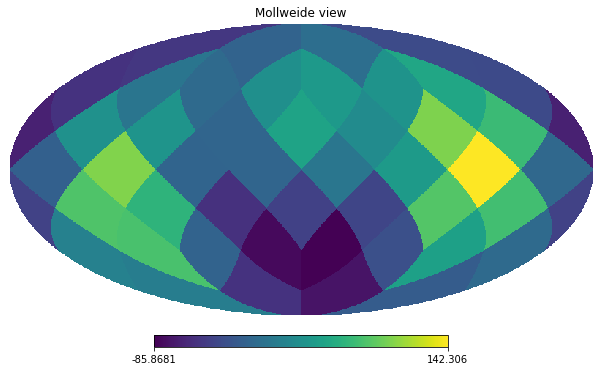

In [21]:
hp.visufunc.mollview(hp.alm2map(fit.current_state, nside=nside))